In [40]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#defining the function
def wrangle(filepath, election_year):
    
#Reading the csv file  
    df = pd.read_csv(filepath)
    
#Dropping unnecessary columns
    drop_columns = ["Unnamed: 3", "ELIGIBLE_OVERSEAS","SOURCE","VOTE_FOR_HIGHEST_OFFICE"]
    
    df = df.drop(columns=[col for col in drop_columns if col in df.columns], errors="ignore")
    
#Definning numeric columns   
    numeric_cols = [
        "TOTAL_BALLOTS_COUNTED", "VAP", "NONCITIZEN_PCT",
        "INELIGIBLE_PRISON", "INELIGIBLE_PROBATION",
        "INELIGIBLE_PAROLE", "INELIGIBLE_FELONS_TOTAL",
        "VEP", "VEP_TURNOUT_RATE", "VAP_TURNOUT_RATE"
         ]

#Cleaning Columns with Comma-separated Values
    cols_to_clean = ["VAP", "INELIGIBLE_PRISON", "INELIGIBLE_PROBATION", 
                 "INELIGIBLE_PAROLE", "INELIGIBLE_FELONS_TOTAL", "VEP"]
    
    df[cols_to_clean] = df[cols_to_clean].apply(lambda x: x.str.replace(',', '').astype(float))
    
#Cleaning Percentage Columns

    cols_to_fix = ["NONCITIZEN_PCT","VEP_TURNOUT_RATE","VAP_TURNOUT_RATE"]
    
    df[cols_to_fix] = df[cols_to_fix].apply(lambda x: x.str.replace('%','').astype(float))
    
#Cleaning the TOTAL_BALLOTS_COUNTED Column

    cols_to_adjust = ["TOTAL_BALLOTS_COUNTED"]
    
    df[cols_to_adjust] = df[cols_to_adjust].astype(str).replace({',': ''}, regex=True).astype(int)
    
#REmoving aggregated data

    df = df[df["STATE"] != "United States"]
    
#Adding a column for Election_Year

    
    df["Election_Year"] = election_year
    
    return df

In [42]:
#loading the dataframe into the wrangle function
df1 = wrangle("Turnout_2024G_v0.3.csv", 2024)
df2 = wrangle("Turnout_2020G_v1.2.csv", 2020)
df3 = wrangle("Turnout_2016G_v1.0.csv", 2016)
df4 = wrangle("Turnout_2012G_v1.0.csv", 2012)

In [43]:
#Evaluating the data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    51 non-null     object 
 1   STATE_ABV                51 non-null     object 
 2   TOTAL_BALLOTS_COUNTED    51 non-null     int64  
 3   VAP                      51 non-null     float64
 4   NONCITIZEN_PCT           51 non-null     float64
 5   INELIGIBLE_PRISON        51 non-null     float64
 6   INELIGIBLE_PROBATION     51 non-null     float64
 7   INELIGIBLE_PAROLE        51 non-null     float64
 8   INELIGIBLE_FELONS_TOTAL  51 non-null     float64
 9   VEP                      51 non-null     float64
 10  VEP_TURNOUT_RATE         51 non-null     float64
 11  VAP_TURNOUT_RATE         51 non-null     float64
 12  Election_Year            51 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 5.6+ KB


In [44]:
#Evaluating the data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    51 non-null     object 
 1   STATE_ABV                51 non-null     object 
 2   TOTAL_BALLOTS_COUNTED    51 non-null     int64  
 3   VAP                      51 non-null     float64
 4   NONCITIZEN_PCT           51 non-null     float64
 5   INELIGIBLE_PRISON        51 non-null     float64
 6   INELIGIBLE_PROBATION     51 non-null     float64
 7   INELIGIBLE_PAROLE        51 non-null     float64
 8   INELIGIBLE_FELONS_TOTAL  51 non-null     float64
 9   VEP                      51 non-null     float64
 10  VEP_TURNOUT_RATE         51 non-null     float64
 11  VAP_TURNOUT_RATE         51 non-null     float64
 12  Election_Year            51 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 5.6+ KB


In [45]:
#Evaluating the data frame
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    51 non-null     object 
 1   STATE_ABV                51 non-null     object 
 2   TOTAL_BALLOTS_COUNTED    51 non-null     int64  
 3   VAP                      51 non-null     float64
 4   NONCITIZEN_PCT           51 non-null     float64
 5   INELIGIBLE_PRISON        51 non-null     float64
 6   INELIGIBLE_PROBATION     51 non-null     float64
 7   INELIGIBLE_PAROLE        51 non-null     float64
 8   INELIGIBLE_FELONS_TOTAL  51 non-null     float64
 9   VEP                      51 non-null     float64
 10  VEP_TURNOUT_RATE         51 non-null     float64
 11  VAP_TURNOUT_RATE         51 non-null     float64
 12  Election_Year            51 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 5.6+ KB


In [46]:
#Evaluating the data frame
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    51 non-null     object 
 1   STATE_ABV                51 non-null     object 
 2   TOTAL_BALLOTS_COUNTED    51 non-null     int64  
 3   VAP                      51 non-null     float64
 4   NONCITIZEN_PCT           51 non-null     float64
 5   INELIGIBLE_PRISON        51 non-null     float64
 6   INELIGIBLE_PROBATION     51 non-null     float64
 7   INELIGIBLE_PAROLE        51 non-null     float64
 8   INELIGIBLE_FELONS_TOTAL  51 non-null     float64
 9   VEP                      51 non-null     float64
 10  VEP_TURNOUT_RATE         51 non-null     float64
 11  VAP_TURNOUT_RATE         51 non-null     float64
 12  Election_Year            51 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 5.6+ KB


In [47]:
#concatenating the data frame
df_clean = pd.concat([df1, df2, df3, df4], ignore_index = True)

In [48]:
#Evaluating the concatenated data frame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    204 non-null    object 
 1   STATE_ABV                204 non-null    object 
 2   TOTAL_BALLOTS_COUNTED    204 non-null    int64  
 3   VAP                      204 non-null    float64
 4   NONCITIZEN_PCT           204 non-null    float64
 5   INELIGIBLE_PRISON        204 non-null    float64
 6   INELIGIBLE_PROBATION     204 non-null    float64
 7   INELIGIBLE_PAROLE        204 non-null    float64
 8   INELIGIBLE_FELONS_TOTAL  204 non-null    float64
 9   VEP                      204 non-null    float64
 10  VEP_TURNOUT_RATE         204 non-null    float64
 11  VAP_TURNOUT_RATE         204 non-null    float64
 12  Election_Year            204 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 20.8+ KB


In [49]:
#saving the cleaned and concatenated data frane into a csv file
df_clean.to_csv("Voter_Turnout_2016_to_2024.csv", index=False)

# Research Questions
Research Question 1: How has the average voter turnout rate (VEP_TURNOUT_RATE and VAP_TURNOUT_RATE) changed across the four election cycles?

Research Question 2: Which states consistently exhibit high or low voter turnout rates, and what factors might explain these trends?

Research Question 3: How do the percentages of noncitizens and counts of ineligible individuals (prison, probation, parole, felons) correlate with voter turnout rates?

Research Question 4: How do ineligibility factors (prison, probation, parole, and felony disenfranchisement) compare between states with the highest and lowest voter turnout rates?

# Research Question 1:
How has the average voter turnout rate (VEP_TURNOUT_RATE and VAP_TURNOUT_RATE) changed across the four election cycles?

In [50]:
#calculating the average voter turnout rate
turnout_by_year = df_clean.groupby('Election_Year')[['VEP_TURNOUT_RATE', 'VAP_TURNOUT_RATE']].mean().reset_index()
print(turnout_by_year)

   Election_Year  VEP_TURNOUT_RATE  VAP_TURNOUT_RATE
0           2012         60.505882         56.345882
1           2016         61.646471         57.431765
2           2020         67.051961         63.336863
3           2024         65.008627         60.850784


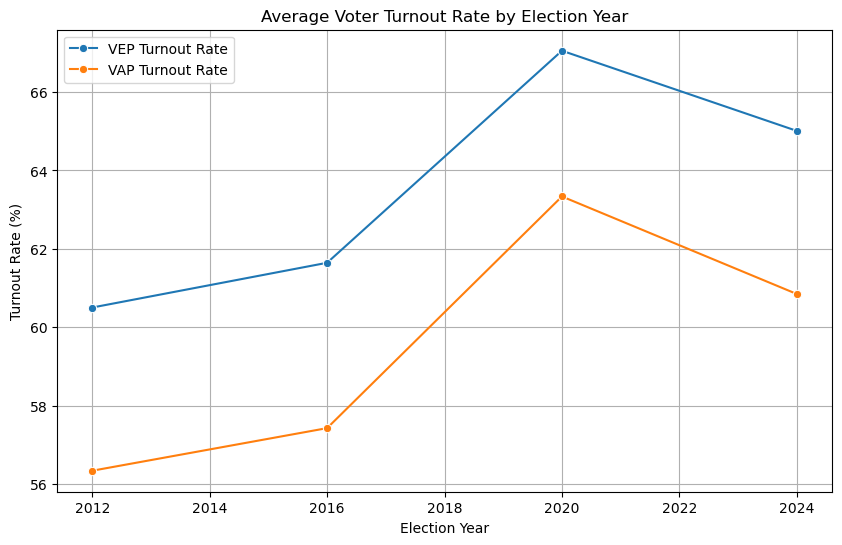

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(data=turnout_by_year, x='Election_Year', y='VEP_TURNOUT_RATE', marker='o', label='VEP Turnout Rate')
sns.lineplot(data=turnout_by_year, x='Election_Year', y='VAP_TURNOUT_RATE', marker='o', label='VAP Turnout Rate')
plt.title('Average Voter Turnout Rate by Election Year')
plt.xlabel('Election Year')
plt.ylabel('Turnout Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Research Question 2
Which states consistently exhibit high or low voter turnout rates?

In [52]:
#Calculating the average VEP turnout by state
state_turnout = df_clean.groupby('STATE')[['VEP_TURNOUT_RATE']].mean().reset_index().sort_values(by='VEP_TURNOUT_RATE')
print(state_turnout)

                   STATE  VEP_TURNOUT_RATE
11                Hawaii           48.2925
36              Oklahoma           52.4525
49         West Virginia           52.8550
3               Arkansas           53.4575
44                 Texas           54.3175
43             Tennessee           55.2700
31            New Mexico           57.3250
24           Mississippi           58.1475
32              New York           58.3075
14               Indiana           58.3775
0                Alabama           59.5975
2                Arizona           59.7775
41        South Carolina           60.2650
17              Kentucky           60.5725
40          Rhode Island           60.9725
28                Nevada           61.1050
4             California           61.2625
51               Wyoming           61.3200
45                  Utah           61.3925
16                Kansas           61.5175
18             Louisiana           61.6100
34          North Dakota           62.1475
42         

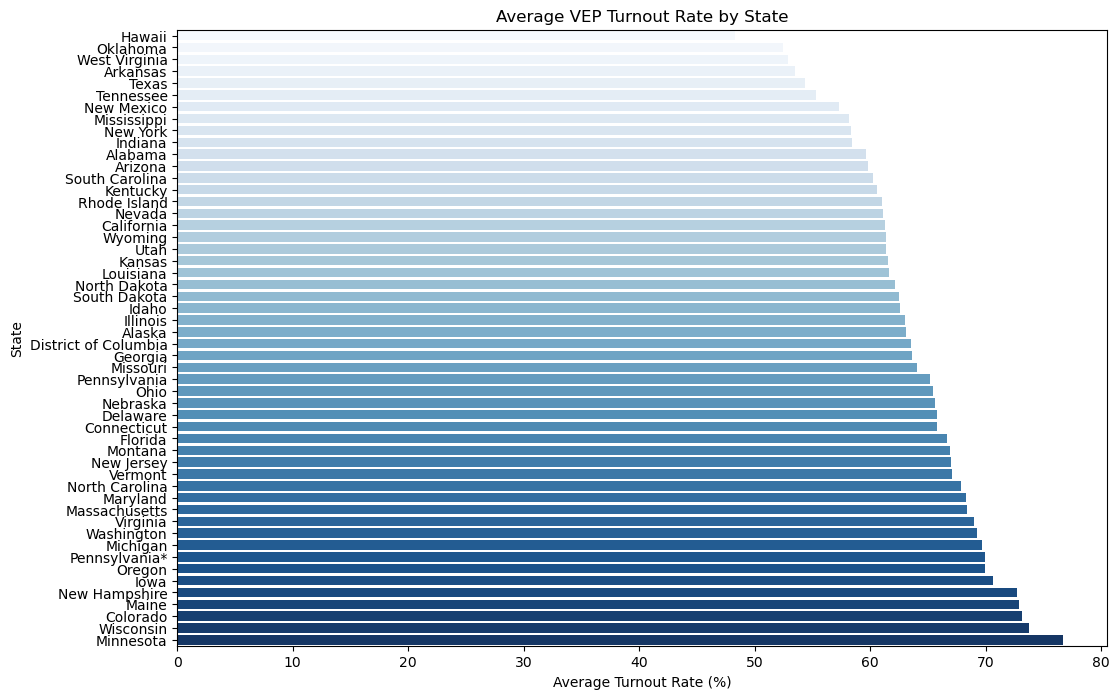

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x='VEP_TURNOUT_RATE', y='STATE', data=state_turnout, palette='Blues')
plt.title('Average VEP Turnout Rate by State')
plt.xlabel('Average Turnout Rate (%)')
plt.ylabel('State')
plt.show()

# Research Question 3

How do the percentages of noncitizens and counts of ineligible individuals (prison, probation, parole, felons) correlate with voter turnout rates?

In [54]:
#specifying the columns
cols = ['NONCITIZEN_PCT', 'INELIGIBLE_PRISON', 'INELIGIBLE_PROBATION', 
        'INELIGIBLE_PAROLE', 'INELIGIBLE_FELONS_TOTAL', 'VEP_TURNOUT_RATE', 'VAP_TURNOUT_RATE']
#calculating the correlation coefficient
corr_matrix = df_clean[cols].corr()
print(corr_matrix)

                         NONCITIZEN_PCT  INELIGIBLE_PRISON  \
NONCITIZEN_PCT                 1.000000           0.520122   
INELIGIBLE_PRISON              0.520122           1.000000   
INELIGIBLE_PROBATION           0.288915           0.591657   
INELIGIBLE_PAROLE              0.387124           0.708169   
INELIGIBLE_FELONS_TOTAL        0.426863           0.853589   
VEP_TURNOUT_RATE              -0.111155          -0.182851   
VAP_TURNOUT_RATE              -0.394726          -0.332460   

                         INELIGIBLE_PROBATION  INELIGIBLE_PAROLE  \
NONCITIZEN_PCT                       0.288915           0.387124   
INELIGIBLE_PRISON                    0.591657           0.708169   
INELIGIBLE_PROBATION                 1.000000           0.529648   
INELIGIBLE_PAROLE                    0.529648           1.000000   
INELIGIBLE_FELONS_TOTAL              0.858230           0.796779   
VEP_TURNOUT_RATE                    -0.145909          -0.220862   
VAP_TURNOUT_RATE           

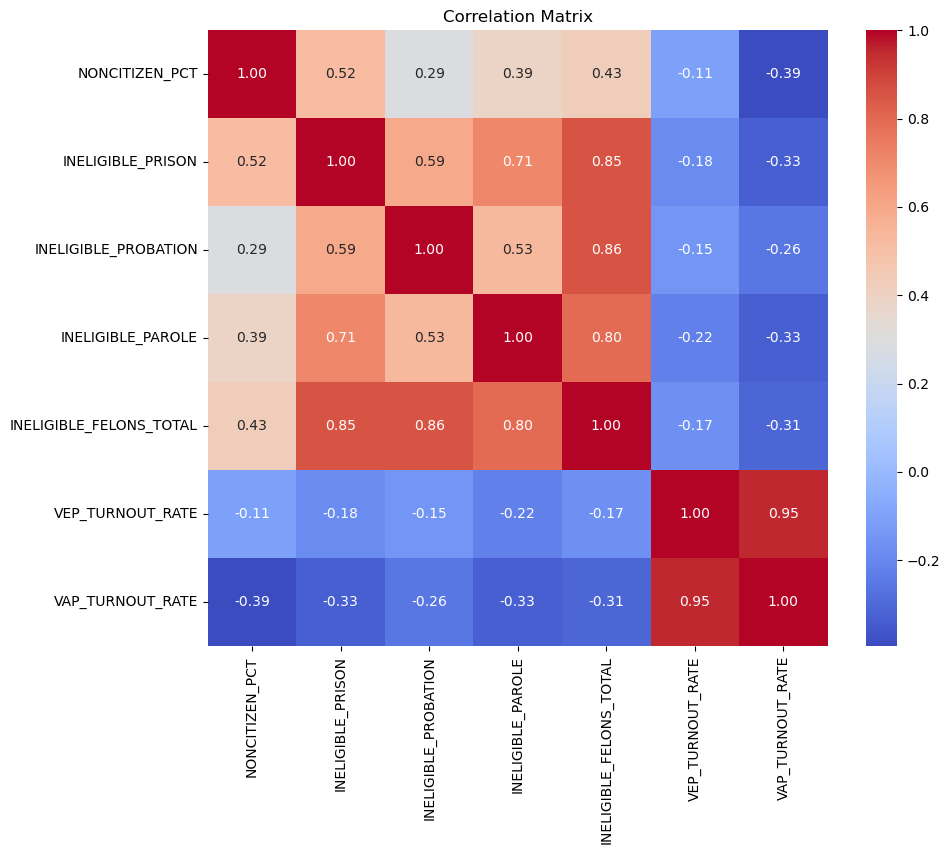

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

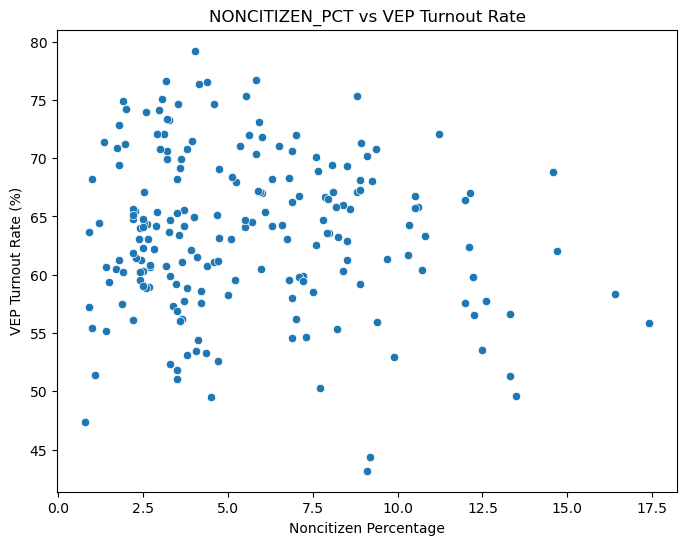

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='NONCITIZEN_PCT', y='VEP_TURNOUT_RATE', data=df_clean)
plt.title('NONCITIZEN_PCT vs VEP Turnout Rate')
plt.xlabel('Noncitizen Percentage')
plt.ylabel('VEP Turnout Rate (%)')
plt.show()

# Research Question 4

How do ineligibility factors (prison, probation, parole, and felony disenfranchisement) compare between states with the highest and lowest voter turnout rates?

In [57]:
# Group by STATE and calculate the mean for each relevant column
state_avg = df_clean.groupby("STATE", as_index=False).mean(numeric_only=True)
# Get the 10 states with the lowest VEP Turnout Rate
lowest_turnout_states = state_avg.nsmallest(10, "VEP_TURNOUT_RATE")

# Select relevant columns for comparison
columns_to_compare = [
    "STATE", "VEP_TURNOUT_RATE", "NONCITIZEN_PCT", 
    "INELIGIBLE_PRISON", "INELIGIBLE_PROBATION",
    "INELIGIBLE_PAROLE", "INELIGIBLE_FELONS_TOTAL"
]

# Filter dataset
low_turnout_analysis = lowest_turnout_states[columns_to_compare]

# Display the data
print(low_turnout_analysis)

            STATE  VEP_TURNOUT_RATE  NONCITIZEN_PCT  INELIGIBLE_PRISON  \
11         Hawaii           48.2925          8.5550            4777.00   
36       Oklahoma           52.4525          4.4175           24232.00   
49  West Virginia           52.8550          0.9475            6414.00   
3        Arkansas           53.4575          3.7500           16223.50   
44          Texas           54.3175         12.8150          145231.00   
43      Tennessee           55.2700          3.6200           23709.00   
31     New Mexico           57.3250          6.7400            5627.50   
24    Mississippi           58.1475          1.5425           19661.00   
32       New York           58.3075         11.3850           39767.75   
14        Indiana           58.3775          3.7925           25434.50   

    INELIGIBLE_PROBATION  INELIGIBLE_PAROLE  INELIGIBLE_FELONS_TOTAL  
11               2450.50               0.00                  7227.50  
36              21384.25            2065.00

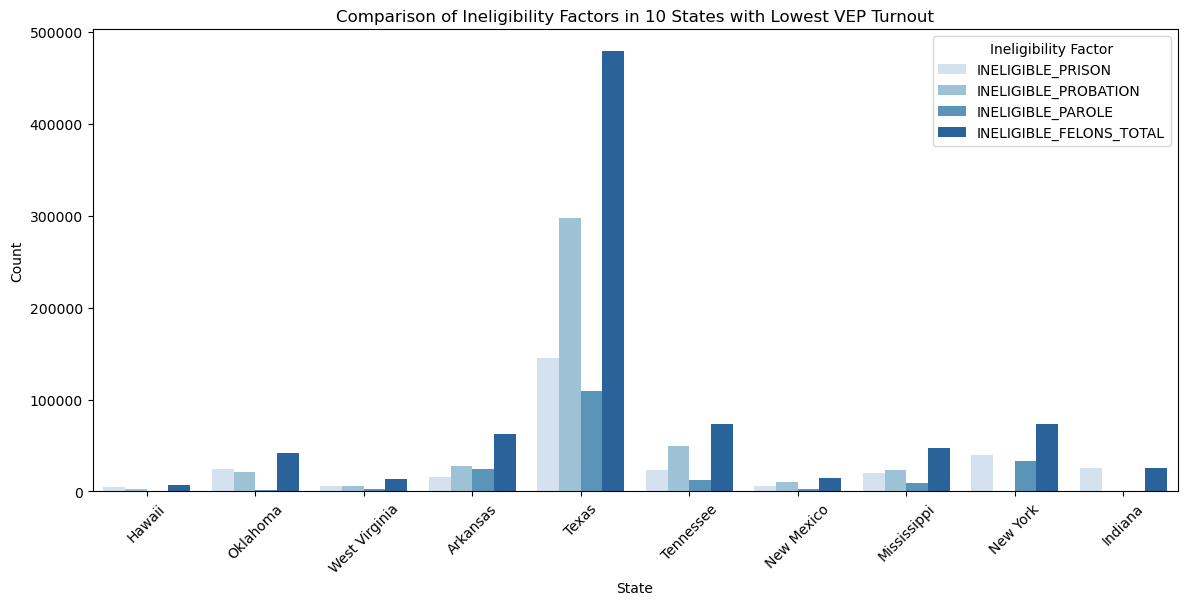

In [58]:
# Define the relevant columns
columns_to_compare = [
    "STATE", "INELIGIBLE_PRISON", "INELIGIBLE_PROBATION",
    "INELIGIBLE_PAROLE", "INELIGIBLE_FELONS_TOTAL"
]

# Get the 10 states with the lowest VEP turnout rate
lowest_turnout_states = state_avg.nsmallest(10, "VEP_TURNOUT_RATE")

# Select relevant columns
low_turnout_analysis = lowest_turnout_states[columns_to_compare]

# Melt the dataframe for better visualization
melted_data_low = low_turnout_analysis.melt(id_vars=["STATE"], 
                                            var_name="Ineligibility Factor", 
                                            value_name="Count")

# Create a grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x="STATE", y="Count", hue="Ineligibility Factor", data=melted_data_low, palette="Blues")
plt.title("Comparison of Ineligibility Factors in 10 States with Lowest VEP Turnout")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Ineligibility Factor")
plt.show()

In [59]:
# Get the 10 states with the highest VEP Turnout Rate
highest_turnout_states = state_avg.nlargest(10, "VEP_TURNOUT_RATE")

# Select relevant columns for comparison
high_turnout_analysis = highest_turnout_states[columns_to_compare]

# Display the data
print(high_turnout_analysis)


            STATE  INELIGIBLE_PRISON  INELIGIBLE_PROBATION  INELIGIBLE_PAROLE  \
23      Minnesota            8959.50              62335.25            5110.00   
50      Wisconsin           21390.25              34153.75           21640.75   
5        Colorado           17184.75                  0.00            5411.00   
19          Maine               0.00                  0.00               0.00   
29  New Hampshire            2182.75                  0.00               0.00   
15           Iowa            8402.25              22148.00            6218.50   
37         Oregon           13423.25                  0.00               0.00   
39  Pennsylvania*           38938.00                  0.00               0.00   
22       Michigan           37205.25                  0.00               0.00   
48     Washington           15877.00              53797.50            8688.25   

    INELIGIBLE_FELONS_TOTAL  
23                 56908.00  
50                 68590.25  
5                 

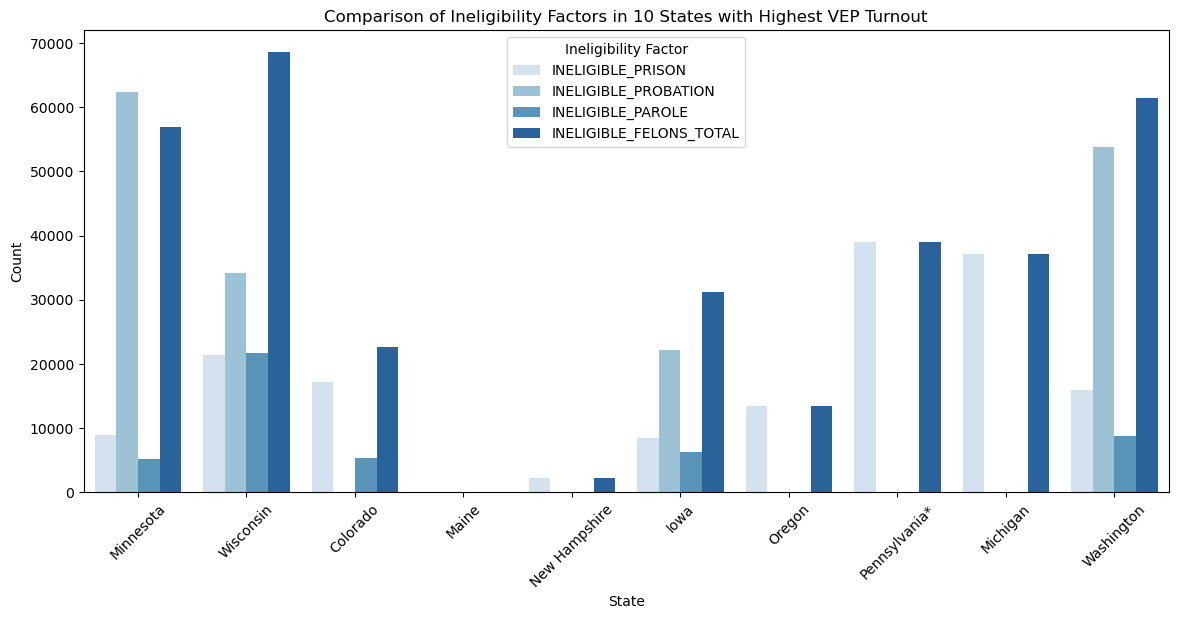

In [60]:
# Define the relevant columns
columns_to_compare = [
    "STATE", "INELIGIBLE_PRISON", "INELIGIBLE_PROBATION",
    "INELIGIBLE_PAROLE", "INELIGIBLE_FELONS_TOTAL"
]

# Get the 10 states with the highest VEP turnout rate
highest_turnout_states = state_avg.nlargest(10, "VEP_TURNOUT_RATE")

# Select relevant columns
high_turnout_analysis = highest_turnout_states[columns_to_compare]

# Melt the dataframe for better visualization
melted_data = high_turnout_analysis.melt(id_vars=["STATE"], 
                                         var_name="Ineligibility Factor", 
                                         value_name="Count")

# Create a grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x="STATE", y="Count", hue="Ineligibility Factor", data=melted_data, palette="Blues")
plt.title("Comparison of Ineligibility Factors in 10 States with Highest VEP Turnout")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Ineligibility Factor")
plt.show()
